COMP396 Milestone 1: Data exploration 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/dsb"


dsgdb9nsd_000001.xyz  dsgdb9nsd_000168.xyz  dsgdb9nsd_000333.xyz
dsgdb9nsd_000002.xyz  dsgdb9nsd_000169.xyz  dsgdb9nsd_000334.xyz
dsgdb9nsd_000003.xyz  dsgdb9nsd_000170.xyz  dsgdb9nsd_000336.xyz
dsgdb9nsd_000004.xyz  dsgdb9nsd_000171.xyz  dsgdb9nsd_000337.xyz
dsgdb9nsd_000005.xyz  dsgdb9nsd_000172.xyz  dsgdb9nsd_000338.xyz
dsgdb9nsd_000006.xyz  dsgdb9nsd_000173.xyz  dsgdb9nsd_000339.xyz
dsgdb9nsd_000007.xyz  dsgdb9nsd_000174.xyz  dsgdb9nsd_000340.xyz
dsgdb9nsd_000008.xyz  dsgdb9nsd_000175.xyz  dsgdb9nsd_000341.xyz
dsgdb9nsd_000009.xyz  dsgdb9nsd_000176.xyz  dsgdb9nsd_000342.xyz
dsgdb9nsd_000010.xyz  dsgdb9nsd_000177.xyz  dsgdb9nsd_000343.xyz
dsgdb9nsd_000011.xyz  dsgdb9nsd_000178.xyz  dsgdb9nsd_000344.xyz
dsgdb9nsd_000012.xyz  dsgdb9nsd_000179.xyz  dsgdb9nsd_000345.xyz
dsgdb9nsd_000013.xyz  dsgdb9nsd_000180.xyz  dsgdb9nsd_000346.xyz
dsgdb9nsd_000014.xyz  dsgdb9nsd_000181.xyz  dsgdb9nsd_000347.xyz
dsgdb9nsd_000015.xyz  dsgdb9nsd_000182.xyz  dsgdb9nsd_000348.xyz
dsgdb9nsd_000016.xyz  dsg

In [0]:
# Torch
import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

import time
import argparse
import os
import numpy as np

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-09-24 20:28:09--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75257002 (72M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  71.77M  84.9MB/s    in 0.8s    

2019-09-24 20:28:10 (84.9 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [75257002/75257002]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==0.24.0=py37_0
    - bzip2==1.0.8=h7b6447c_0
    - ca-certificates==2019.5.15=0
    - certifi==2019.6.16=py37_0
    - cffi==1.12.3=py37h2e261b9_0
    - chardet==3.0.4=py37_1
    - conda-packa

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
root = "/content/drive/My Drive/dsb/"


In [0]:
file_list = os.listdir(root)
num_mols = len(file_list)
print(num_mols)

495


In [0]:
def read_xyz(file_name):
    with open(file_name, 'rb') as file:
        num_atoms = int(file.readline())
        properties = file.readline().split()[1:17]
        properties = [num.replace(b'*^', b'e') for num in properties] 
        properties = [float(prop) for prop in properties]
        atom_types = [0]*num_atoms
        coords = np.array(np.zeros([num_atoms,3]))
        for na in range(num_atoms):
            coord_line = file.readline().split()
            atom_types[na] = coord_line[0]
            xyz_coords = coord_line[1:4]
            xyz_coords = [num.replace(b'*^', b'e') for num in xyz_coords] 
            coords[na,:] = [float(num) for num in xyz_coords]  
        vib_freqs = file.readline()
        smiles = file.readline().split()[0]
        inchis = file.readline()
        
    return smiles, properties, atom_types, coords

In [0]:
smiles = [0]*num_mols
properties = [0]*num_mols 
atom_types = [0]*num_mols
coords = [0]*num_mols

for im in range(num_mols):
    smiles[im], properties[im], atom_types[im], coords[im] = read_xyz(root+file_list[im])

biggest_mol_size = max([len(atom_list) for atom_list in atom_types])

print("size of largest molecule = ", biggest_mol_size)

size of largest molecule =  20


In [0]:
#Information retrieved from a single xyz molecule 
print(smiles[400])
print(properties[400])
print(atom_types[400])
print(coords[400])

b'OC1(CC1)C#N'
[406.0, 6.09849, 3.15469, 2.5059, 3.5524, 47.42, -0.2828, 0.0136, 0.2964, 521.6025, 0.084237, -285.282853, -285.276998, -285.276054, -285.311886, 21.226]
[b'O', b'C', b'C', b'C', b'C', b'N', b'H', b'H', b'H', b'H', b'H']
[[-4.85023841e-02  1.37466413e+00 -6.98426214e-02]
 [-1.91569230e-03 -1.82411101e-02 -3.38496380e-03]
 [-4.69418597e-01 -7.09346128e-01  1.26706900e+00]
 [-1.34299477e+00 -7.03403115e-01  4.07563587e-02]
 [ 1.07227815e+00 -6.29557386e-01 -7.58263268e-01]
 [ 1.95202783e+00 -1.09727648e+00 -1.34586879e+00]
 [ 7.34695898e-01  1.72623077e+00  3.70058278e-01]
 [ 1.72597512e-02 -1.63262397e+00  1.55815355e+00]
 [-7.36600249e-01 -4.29273844e-02  2.07899873e+00]
 [-2.19212682e+00 -3.04978072e-02  2.68220819e-02]
 [-1.46439637e+00 -1.62202879e+00 -5.19709023e-01]]


In [0]:
import pandas as pd
dtype = [('mu','int32'), ('alpha','float32'), ('HOMO','float32'),('LUMO','int32'), ('Gap','float32'), ('R2','float32'),('ZPVE','int32'), ('U0','float32'), ('U','float32'),('H','int32'), ('G','float32'), ('CV','float32'),('Col14','float32'), ('Col14','float32'),('Col16','float32'), ('Col16','float32'),('Col17','float32')]
values = properties
#index = ['Row'+str(i) for i in range(1, len(values)+1)]

df = pd.DataFrame(values, )

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469
1,4.0,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574
2,9.0,160.28041,8.593230,8.593210,0.7156,28.78,-0.2609,0.0613,0.3222,177.1963,0.055410,-116.609549,-116.605550,-116.604606,-116.633775,12.482
3,10.0,159.03567,9.223270,9.223240,3.8266,24.45,-0.3264,0.0376,0.3640,160.7223,0.045286,-132.718150,-132.714563,-132.713619,-132.742149,10.287
4,3.0,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002


In [0]:
#!pip install rdkit
#!apt-get install python-rdkit librdkit1 rdkit-data
import rdkit
from rdkit import Chem

In [0]:
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

In [0]:
DrawingOptions.bondLineWidth=2.0

b'CC1CC1O'


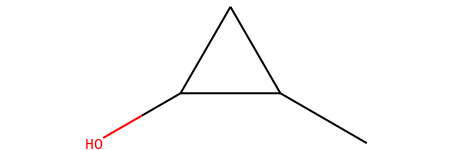

In [0]:
#Smile string representation where hydrogens are implicitly included
sample1=Chem.MolFromSmiles(smiles[100])
print(smiles[100])
sample1

b'CC1=COC=N1'


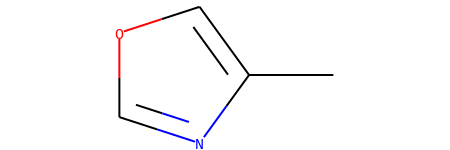

In [0]:
#Smile string representation where hydrogens are implicitly included
sample2=Chem.MolFromSmiles(smiles[200])
print(smiles[200])
sample2

b'CC1(O)CCC1'


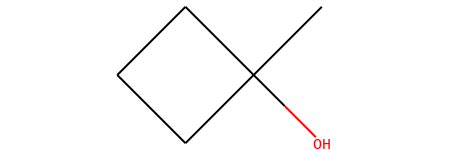

In [0]:
#Smile string representation where hydrogens are implicitly included
sample3=Chem.MolFromSmiles(smiles[300])
print(smiles[300])
sample3

In [0]:
#Getting the number of atoms in the smile
sample3.GetNumAtoms()

6

In [0]:
#Generating depictions (2D)
print (Chem.MolToMolBlock(sample1))


     RDKit          2D

  5  5  0  0  0  0  0  0  0  0999 V2000
    2.3660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1830   -2.0490    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  4  2  1  0
M  END



In [0]:
#Generating depictions (2D)
print (Chem.MolToMolBlock(sample2))


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    2.1213    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213   -1.0607    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
  5  6  1  0
  6  2  1  0
M  END



In [0]:
#Generating depictions (2D)
print (Chem.MolToMolBlock(sample3))


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    2.1213    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213   -1.0607    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
  5  6  1  0
  6  2  1  0
M  END



In [0]:
#Generating depictions (3D)
AllChem.EmbedMolecule(sample1)
print (Chem.MolToMolBlock(sample1))



     RDKit          3D

  5  5  0  0  0  0  0  0  0  0999 V2000
    1.4958   -0.7759    0.1867 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6877    0.3165   -0.4444 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0865    1.1907    0.4650 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8012    0.2006   -0.4085 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2958   -0.9320    0.2012 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  4  2  1  0
M  END



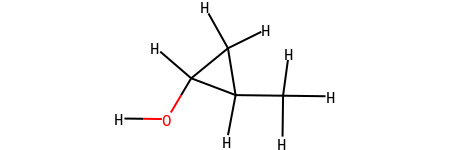

In [0]:
# Eplicitly adding hydrogens
from rdkit.Chem import AllChem
sample1H = AllChem.AddHs(sample1)
DrawingOptions.includeAtomNumbers=False
sample1H

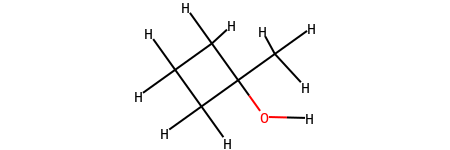

In [0]:
sample2H = AllChem.AddHs(sample2)
sample2H

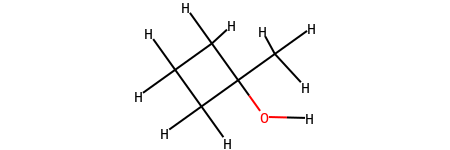

In [0]:
sample3H = AllChem.AddHs(sample3)
DrawingOptions.includeAtomNumbers=True
sample3H

In [0]:
#Generating depictions with hydrogens explicitly represented
print (Chem.MolToMolBlock(sample3H))


     RDKit          2D

 16 16  0  0  0  0  0  0  0  0999 V2000
    2.1213    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213   -1.0607    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1820    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.3034    0.1372    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5760    1.7586    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.6067   -0.8519    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213    1.0607    0

In [0]:
#Generating depictions (3D)
AllChem.EmbedMolecule(sample1H)
print (Chem.MolToMolBlock(sample1H))


     RDKit          3D

 13 13  0  0  0  0  0  0  0  0999 V2000
    1.4298    0.3046    0.3538 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3487   -0.4080   -0.4168 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8283   -0.9944    0.2270 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9360    0.2294   -0.6636 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3757    1.3599    0.0160 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5367    1.3184   -0.1341 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.2043    0.4683    1.4051 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4342   -0.1688    0.2141 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7703   -1.0080   -1.2767 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3181   -1.8847   -0.2063 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0128   -0.8919    1.3146 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4076    0.1251   -1.6676 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8453    1.5502    0.8346 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0